In [1]:
import sys
import lightkurve as lk
sys.path.insert(0, "../")

from michael import janet

Hi there. Welcome to the good place.


# Flux Override Example

In order to make sure `michael` works as expected, we'll want to be able to test it on data that doesn't come from the TESS mission, such as *Kepler* data we know the truth values for, or simulated data.

The `flux_override()` function lets you input a custom `time` and `flux`, and then run through the stages of `michael` manually to measure the rotation period.

This function is only intended for testing. A full-fledged expansion of `michael` to data not from `eleanor` will come at some point, hopefully!

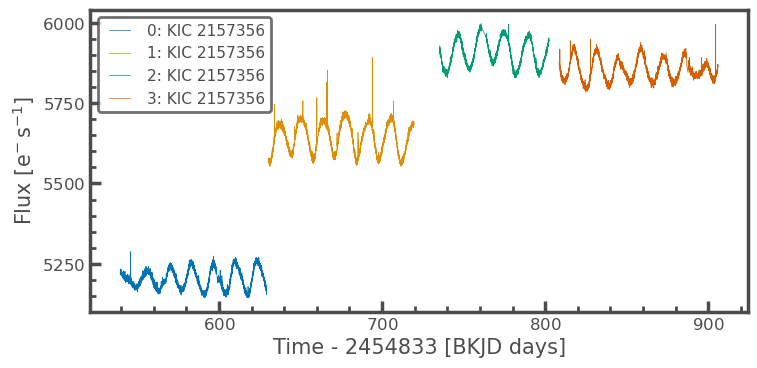

In [2]:
sr = lk.search_lightcurve('KIC 2157356')
lcc = sr[5:9].download_all()
lcc.plot()

/Users/Anaconda/anaconda3/lib/python3.8/site-packages/lightkurve/lightcurve.py:988: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  warnings.warn(


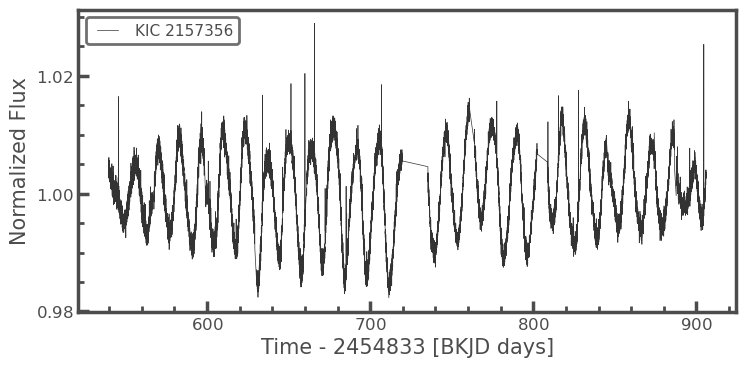

In [3]:
lc = lcc.stitch().normalize().remove_nans().remove_outliers()
lc.plot();

In [4]:
time = lc.time
flux = lc.flux

`michael` was never meant to be used with Kepler, so I'm giving it some hacky inputs.

In [5]:
j = janet(gaiaid = 'Kepler Test',
          output_path = "/Users/oliver hall/Research/unicorn/data/keplertests/")

In [6]:
j.flux_override(time, flux)

In [7]:
j.get_rotation(period_range = (10., 15.))

### Running Simple Astropy Lomb-Scargle on Sector all on star Kepler Test ###
### Completed Simple Astropy Lomb-Scargle for Sector all on star Kepler Test ###
### Saved results ###
### Running Wavelet Estimation on star Kepler Test ###


/Users/Anaconda/anaconda3/lib/python3.8/site-packages/jazzhands/wavelets.py:488: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm



### Completed Wavelet Estimation on star Kepler Test ###
### Saved results ###
### Running ACF Estimation on star Kepler Test ###
### Completed ACF Estimation on star Kepler Test ###
### Saved results ###


In [8]:
j.validate_rotation()

### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###


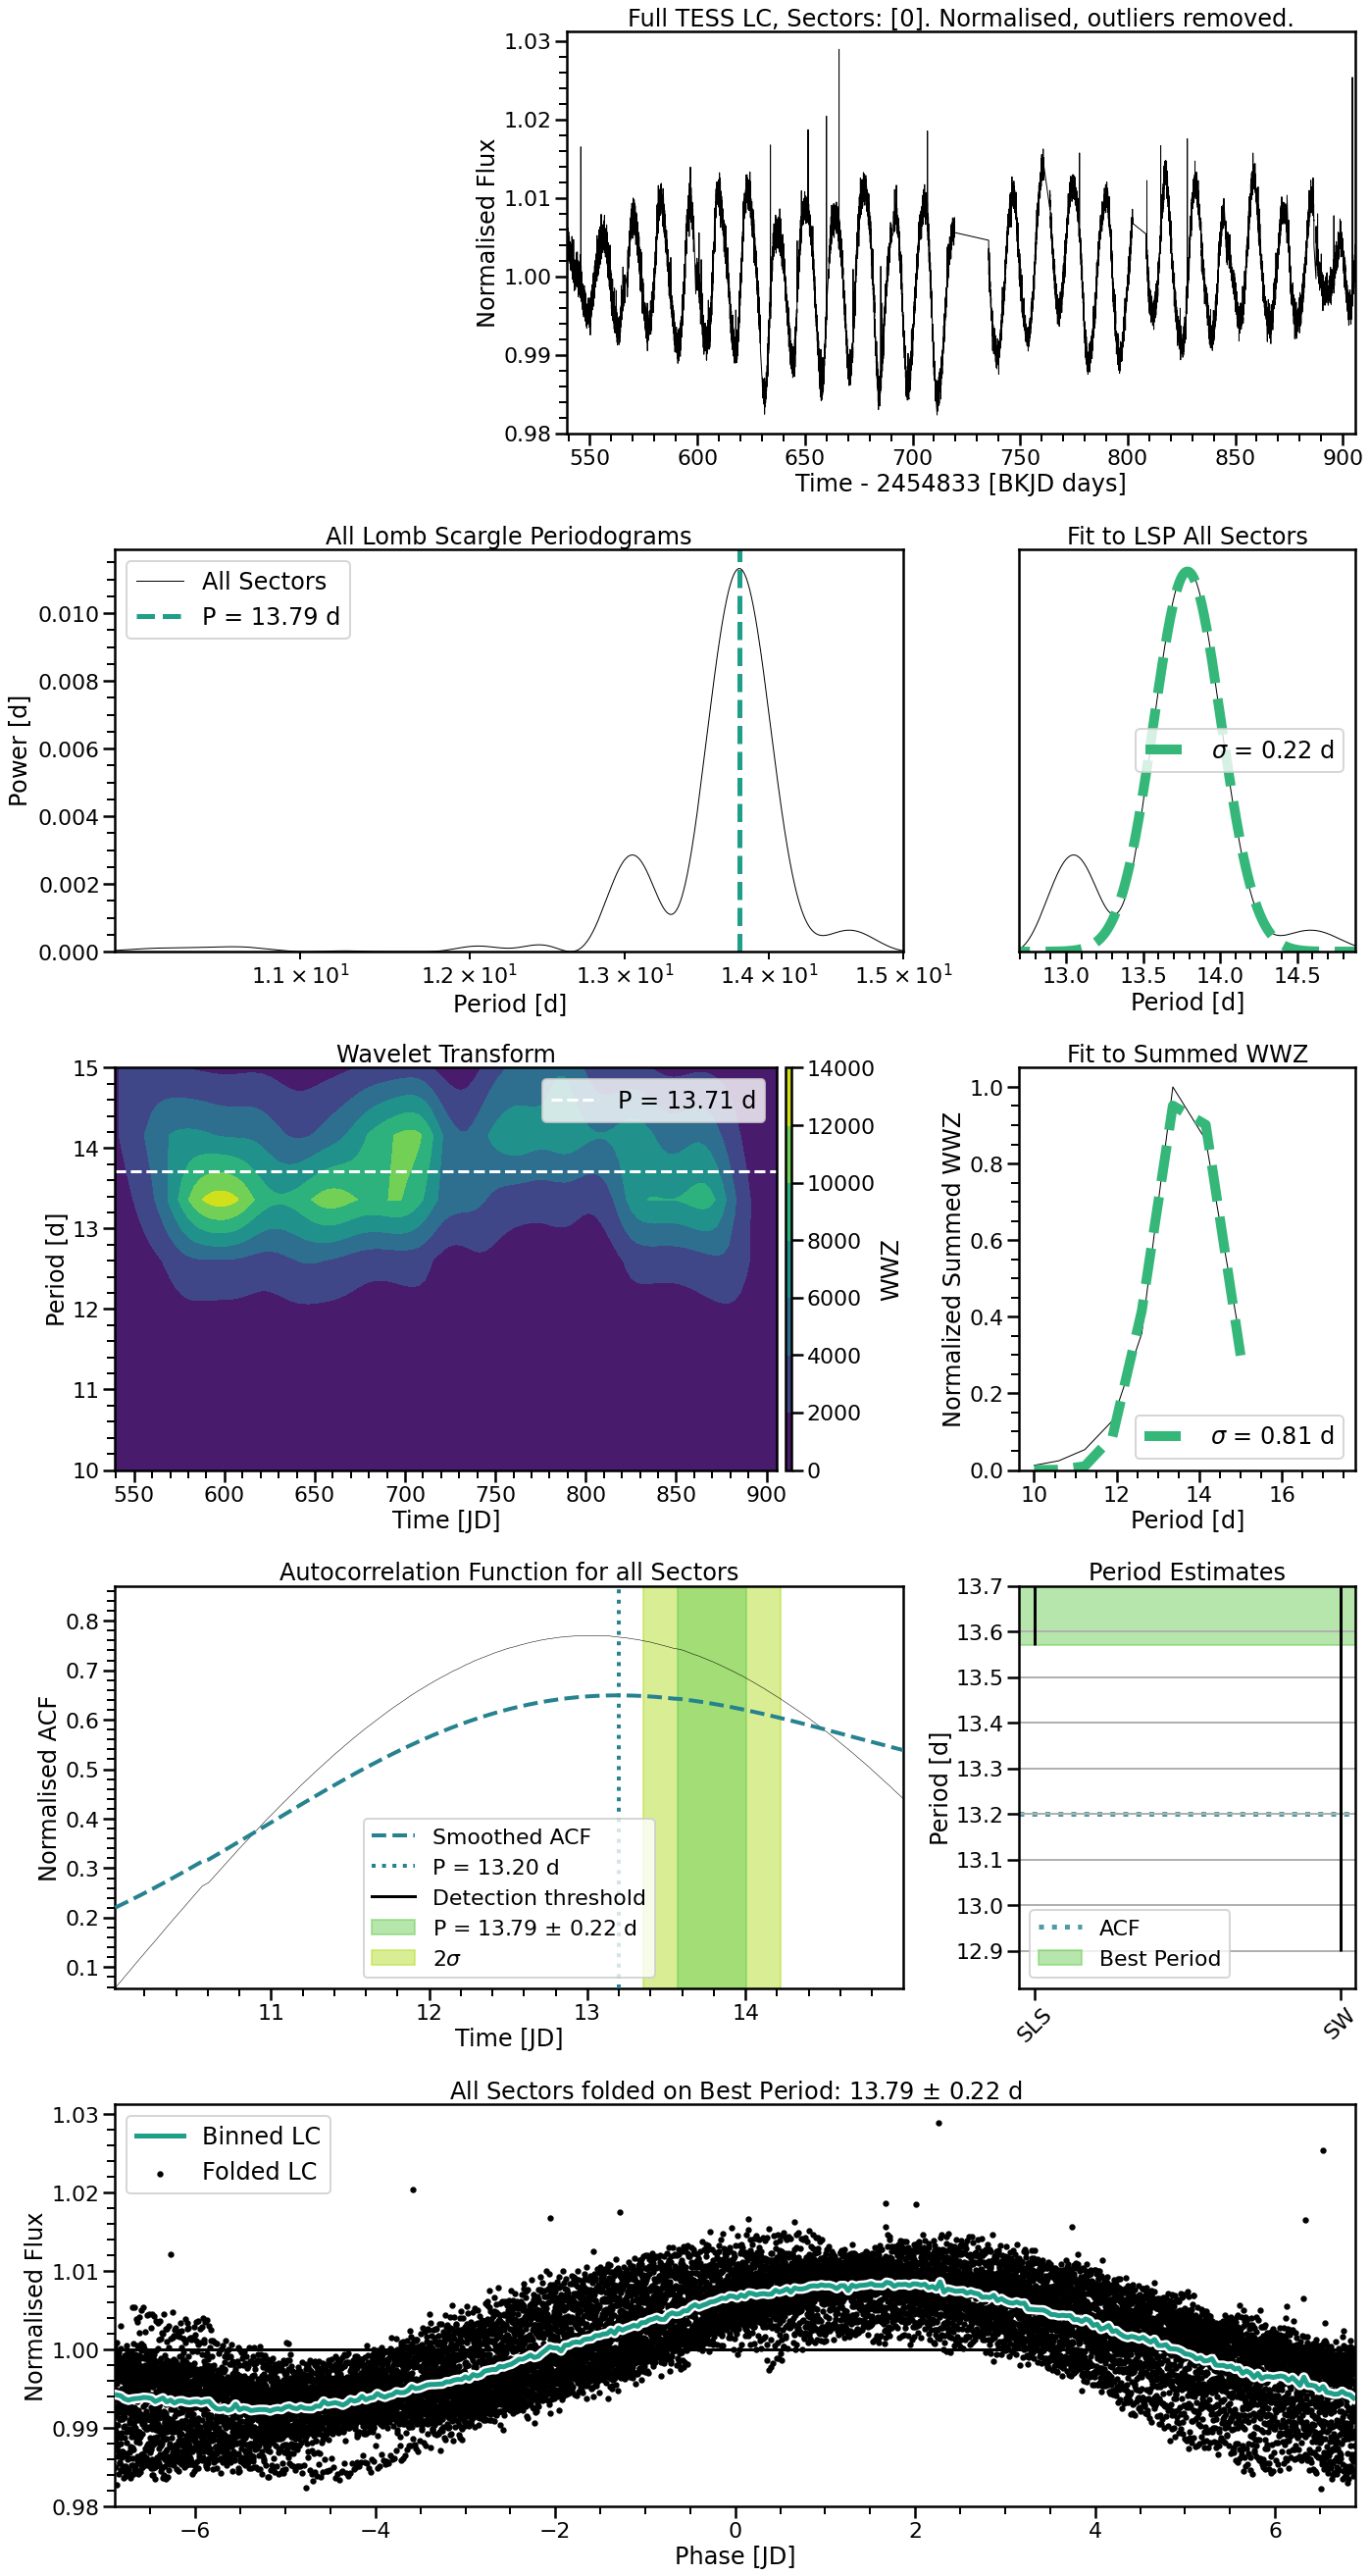

In [9]:
j.view()

In [10]:
j.period_range

AttributeError: 'janet' object has no attribute 'period_range'